In [238]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt           #Useful for Visualization
import seaborn as sns                     #Useful for Visualization 
%matplotlib inline  
import matplotlib.mlab as mlab
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!



PART A

In [2]:
#Reading the Input File 
h1b=pd.read_csv("D:/Subjects/course7245/h1b_kaggle.csv/h1b_kaggle.csv")
h1b.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
h1b.info()  #Checking total entries,all the columns and it's datatype in the dataset.
h1b.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


(3002458, 11)

In [4]:
#Data cleaning
#Null values in the dataset.So checking how many non null values are there for each column
h1b[h1b.isnull()==False].count()    #not null values for each column

Unnamed: 0            3002458
CASE_STATUS           3002445
EMPLOYER_NAME         3002399
SOC_NAME              2984724
JOB_TITLE             3002415
FULL_TIME_POSITION    3002443
PREVAILING_WAGE       3002373
YEAR                  3002445
WORKSITE              3002458
lon                   2895216
lat                   2895216
dtype: int64

In [5]:
h1b.isnull().any()  #checking for null values if present or not

Unnamed: 0            False
CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [6]:
#Null values in ascending order
h1b.isnull().sum().sort_values(ascending = False) 

lat                   107242
lon                   107242
SOC_NAME               17734
PREVAILING_WAGE           85
EMPLOYER_NAME             59
JOB_TITLE                 43
FULL_TIME_POSITION        15
YEAR                      13
CASE_STATUS               13
WORKSITE                   0
Unnamed: 0                 0
dtype: int64

In [7]:
#drooping non appropriate values from the data and then analyzing the type of data
h1b.drop(["Unnamed: 0"],inplace = True,axis = 1)
h1b.head()
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 10 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), object(6)
memory usage: 229.1+ MB


In [8]:
print('Number of entries:', h1b.shape[0])
print('Number of missing data in each column:')
print(h1b.isnull().sum())

Number of entries: 3002458
Number of missing data in each column:
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64


In [9]:
#Are there inappropraite values
#Checking the NA, Different data type values
columnNames = h1b.columns.values
numberNan = np.zeros(len(columnNames),dtype=np.uint32)
i = 0
for k in columnNames:
    numberNan[i] = h1b[k].isnull().sum()
    i += 1


In [10]:
h1b=h1b.dropna()
h1b.dropna(inplace=True)

In [11]:
#Removed bad data.and now its clean data named h1b
h1b.isnull().sum().sort_values(ascending = False)

lat                   0
lon                   0
WORKSITE              0
YEAR                  0
PREVAILING_WAGE       0
FULL_TIME_POSITION    0
JOB_TITLE             0
SOC_NAME              0
EMPLOYER_NAME         0
CASE_STATUS           0
dtype: int64

In [12]:
h1b.isna().sum().sort_values(ascending = False)

lat                   0
lon                   0
WORKSITE              0
YEAR                  0
PREVAILING_WAGE       0
FULL_TIME_POSITION    0
JOB_TITLE             0
SOC_NAME              0
EMPLOYER_NAME         0
CASE_STATUS           0
dtype: int64

In [13]:
#There are some duplicate employer names. Normalization is done for the variables 
import re
h1b.EMPLOYER_NAME = h1b.EMPLOYER_NAME.apply(lambda x: re.sub(' +',' ', x.strip()))
h1b.JOB_TITLE = h1b.JOB_TITLE.apply(lambda x: re.sub(' +',' ', x.strip()))
h1b.WORKSITE = h1b.WORKSITE.apply(lambda x: re.sub(' +',' ', x.strip()))
h1b.SOC_NAME = h1b.SOC_NAME.apply(lambda x: re.sub(' +',' ', x.strip()))

In [14]:
h1b.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [15]:
#no null values
h1b.isnull().any()

CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                   False
lat                   False
dtype: bool

In [16]:
#Total number of rows in each column
h1b[h1b.isnull()==False].count() 

CASE_STATUS           2877765
EMPLOYER_NAME         2877765
SOC_NAME              2877765
JOB_TITLE             2877765
FULL_TIME_POSITION    2877765
PREVAILING_WAGE       2877765
YEAR                  2877765
WORKSITE              2877765
lon                   2877765
lat                   2877765
dtype: int64

In [17]:
# How is the data distributed? Nominal variable Hazardous,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE
CASE_STATUS_cat=h1b.CASE_STATUS.unique()
CASE_STATUS_cat

# count of the values in dataset by grouping case_status
h1b.groupby('CASE_STATUS').count()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
CASE_STATUS,,,,,,,,,
CERTIFIED,2512114,2512114,2512114,2512114,2512114,2512114,2512114,2512114,2512114
CERTIFIED-WITHDRAWN,195721,195721,195721,195721,195721,195721,195721,195721,195721
DENIED,85161,85161,85161,85161,85161,85161,85161,85161,85161
INVALIDATED,1,1,1,1,1,1,1,1,1
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,15,15,15,15,15,15,15,15,15
REJECTED,1,1,1,1,1,1,1,1,1
WITHDRAWN,84752,84752,84752,84752,84752,84752,84752,84752,84752


In [18]:
EMPLOYER_NAME_cat=h1b.EMPLOYER_NAME.unique()
EMPLOYER_NAME_cat

# count of the values in dataset by grouping Employer names 
h1b.groupby('EMPLOYER_NAME').count()

,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
EMPLOYER_NAME,,,,,,,,,
"""EXCELLENT COMPUTING DISTRIBUTORS INC""",1,1,1,1,1,1,1,1,1
"""I HAVE A DREAM"" FOUNDATION",2,2,2,2,2,2,2,2,2
"""K"" LINE AMERICA",5,5,5,5,5,5,5,5,5
"""K"" LINE AMERICA, INC.",7,7,7,7,7,7,7,7,7
"""K"" LINE LOGISITCS (U.S.A.) INC.",1,1,1,1,1,1,1,1,1
"""K"" LINE LOGISTICS USA INC.",3,3,3,3,3,3,3,3,3
"""K"" LINE LOGISTICS USA, INC.",1,1,1,1,1,1,1,1,1
&QUOT;K&QUOT; LINE AMERICA,1,1,1,1,1,1,1,1,1
"&QUOT;K&QUOT; LINE AMERICA, INC.",1,1,1,1,1,1,1,1,1


In [19]:
SOC_NAME_cat=h1b.SOC_NAME.unique()
SOC_NAME_cat

# count of the values in dataset
h1b.groupby('SOC_NAME').count()

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
SOC_NAME,,,,,,,,,
13-2011.01,1,1,1,1,1,1,1,1,1
15-1121,2,2,2,2,2,2,2,2,2
15-1132,1,1,1,1,1,1,1,1,1
15-1199.01,1,1,1,1,1,1,1,1,1
15-1199.01 SW QUALITY ASSURANCE ENGNRS & TESTERS,1,1,1,1,1,1,1,1,1
"15-1199.08, BUSINESS INTELLIGENCE ANALYSTS",1,1,1,1,1,1,1,1,1
17-2051,1,1,1,1,1,1,1,1,1
17-2072,1,1,1,1,1,1,1,1,1
27-3031,1,1,1,1,1,1,1,1,1


In [20]:
JOB_TITLE_cat=h1b.JOB_TITLE.unique()
JOB_TITLE_cat

# count of the values in dataset by grouping Job titles
h1b.groupby('JOB_TITLE').count()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
JOB_TITLE,,,,,,,,,
"""BUSINESS SYSTEM ANALYST",1,1,1,1,1,1,1,1,1
"""SALES MANAGER",1,1,1,1,1,1,1,1,1
"""TEST"" SENIOR SCIENTIST",1,1,1,1,1,1,1,1,1
"""TRAIN THE TRAINER"" PROGRAM SUPERVISOR",1,1,1,1,1,1,1,1,1
'ACCOUNTANT,1,1,1,1,1,1,1,1,1
'COMPUTER SYSTEMS ANALYSTS,1,1,1,1,1,1,1,1,1
'DIRECTOR OF USER ACQUISITION,1,1,1,1,1,1,1,1,1
'OF COUNSEL' TRANSACTION ATTORNEY,1,1,1,1,1,1,1,1,1
( CONSULTANT) ETL DEVELOPER,1,1,1,1,1,1,1,1,1


In [21]:
FULL_TIME_POSITION_cat=h1b.FULL_TIME_POSITION.unique()
JOB_TITLE_cat

# count of the values in dataset full time positions are there or not
h1b.groupby('FULL_TIME_POSITION').count()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
FULL_TIME_POSITION,,,,,,,,,
N,408044,408044,408044,408044,408044,408044,408044,408044,408044
Y,2469721,2469721,2469721,2469721,2469721,2469721,2469721,2469721,2469721


In [22]:
YEAR_cat=h1b.YEAR.unique()
YEAR_cat

# count of the values in dataset
h1b.groupby('YEAR').count()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE,lon,lat
YEAR,,,,,,,,,
2011.0,333625,333625,333625,333625,333625,333625,333625,333625,333625
2012.0,394267,394267,394267,394267,394267,394267,394267,394267,394267
2013.0,422427,422427,422427,422427,422427,422427,422427,422427,422427
2014.0,498027,498027,498027,498027,498027,498027,498027,498027,498027
2015.0,600120,600120,600120,600120,600120,600120,600120,600120,600120
2016.0,629299,629299,629299,629299,629299,629299,629299,629299,629299


In [23]:
# What are the summary statistics - describe the dataset
h1b.PREVAILING_WAGE.describe()

count    2.877765e+06
mean     1.451666e+05
std      5.307856e+06
min      0.000000e+00
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

In [24]:
# mean of the year with Wage in the dataset
h1b.groupby('YEAR').mean().PREVAILING_WAGE

YEAR
2011.0    194288.060074
2012.0    176106.822690
2013.0    194009.647824
2014.0    181762.305063
2015.0     91661.156577
2016.0     89016.344110
Name: PREVAILING_WAGE, dtype: float64

In [25]:
# median of the year with Wage in the dataset
h1b.groupby('YEAR').median().PREVAILING_WAGE  

YEAR
2011.0    61152.0
2012.0    62546.0
2013.0    64085.0
2014.0    65166.0
2015.0    66498.0
2016.0    68411.0
Name: PREVAILING_WAGE, dtype: float64

In [26]:
# median of the CASE_STATUS with Wage in the dataset
h1b.groupby('CASE_STATUS').median().PREVAILING_WAGE

CASE_STATUS
CERTIFIED                                              65312.0
CERTIFIED-WITHDRAWN                                    64230.0
DENIED                                                 60216.0
INVALIDATED                                           190195.0
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED     75171.0
REJECTED                                               57886.0
WITHDRAWN                                              65674.0
Name: PREVAILING_WAGE, dtype: float64

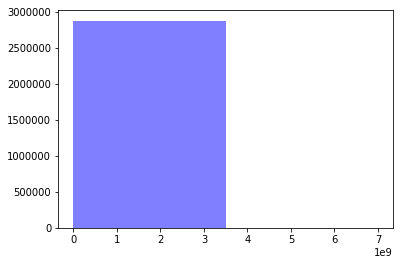

In [27]:
#Anomalies/outliers
x = h1b.PREVAILING_WAGE
num_bins = 2
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

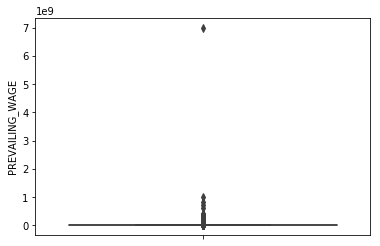

In [28]:
# Make boxplot for one group only and can be seen that there is outliers in the Prevailing_wage variable
sns.boxplot( y=h1b["PREVAILING_WAGE"] )
#sns.plt.show()


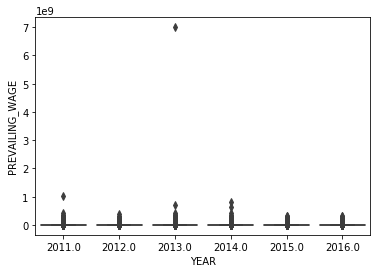

In [29]:
sns.boxplot( x=h1b["YEAR"], y=h1b["PREVAILING_WAGE"] )
#sns.plt.show()
#It can be seen that the outlier is in year 2013

In [30]:
#Top 20 Job titles with maxiumum Jobs and the top most is PROGRAMMER ANALYST
Job_volume = h1b['JOB_TITLE'].value_counts()[:20]
Job_volume

PROGRAMMER ANALYST             244274
SOFTWARE ENGINEER              119063
COMPUTER PROGRAMMER             68793
SYSTEMS ANALYST                 60924
SOFTWARE DEVELOPER              41951
BUSINESS ANALYST                39134
COMPUTER SYSTEMS ANALYST        34138
TECHNOLOGY LEAD - US            28308
SENIOR SOFTWARE ENGINEER        26667
TECHNOLOGY ANALYST - US         26033
ASSISTANT PROFESSOR             24458
SENIOR CONSULTANT               24153
CONSULTANT                      22643
PROJECT MANAGER                 19046
DATABASE ADMINISTRATOR          16121
PHYSICAL THERAPIST              14239
RESEARCH ASSOCIATE              13419
COMPUTER PROGRAMMER ANALYST     13142
ACCOUNTANT                      12934
DEVELOPER                       12737
Name: JOB_TITLE, dtype: int64

In [31]:
#Top 20 Work Site with maxiumum Jobs and the top most is New York where maximum jobs are present
WORKSITE_volume = h1b['WORKSITE'].value_counts()[:20]
WORKSITE_volume

NEW YORK, NEW YORK            190864
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

In [32]:
#Plot each colmun as appropriate for the data type
# Box plots scale data by difference between max & min values
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
data_scaled = scaled_df(h1b)

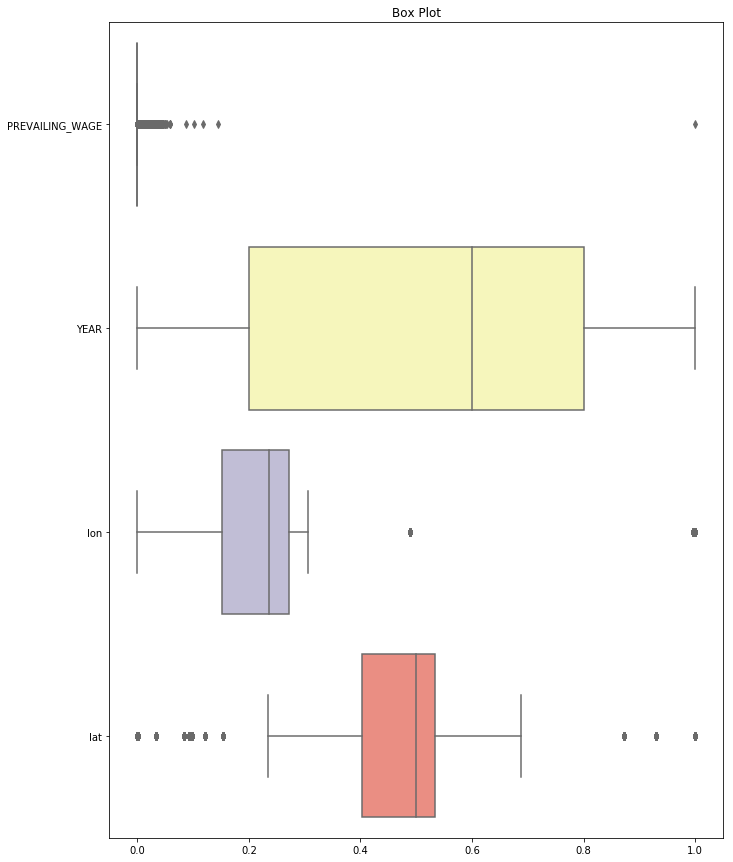

In [33]:
# scaled box plot
f, ax = plt.subplots(figsize=(11, 15))
ax.set_facecolor('#FFFFFF')
plt.title("Box Plot")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = data_scaled, 
  orient = 'h', 
  palette = 'Set3')

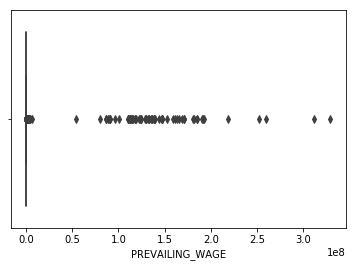

In [34]:
# plotting a box  plot 
df1=h1b[h1b['YEAR']==2016]
plt.figure()
sns.boxplot(x="PREVAILING_WAGE", data = df1)

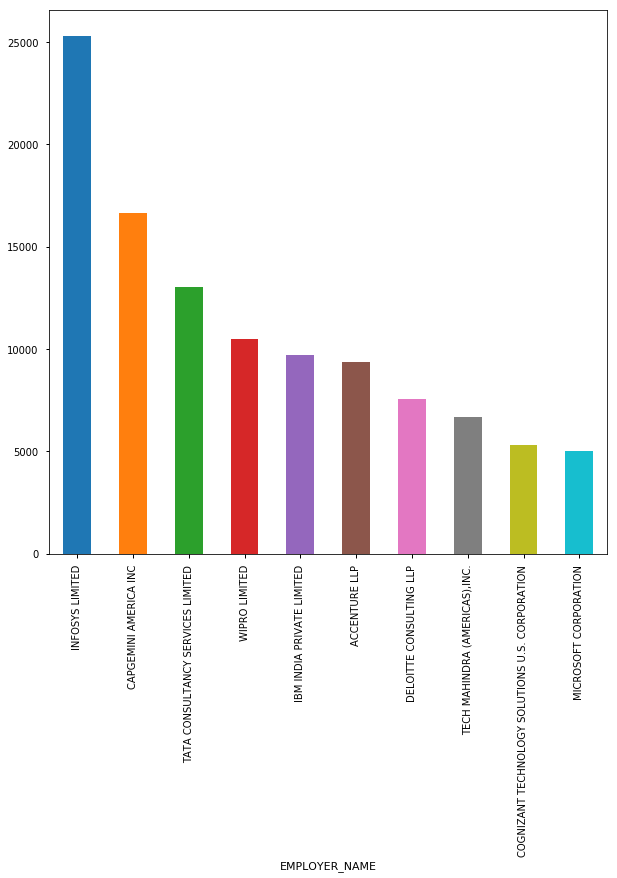

In [40]:
# Plot each colmun as appropriate for the data type
df1=h1b[h1b['YEAR']==2016]
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,10))
df1.groupby(['EMPLOYER_NAME']).size().sort_values(ascending=False).head(10).plot(kind='bar')

Top 10 Employers with highest H1B visa applications in 2016 -  Infosys applied the highest visas in 2016

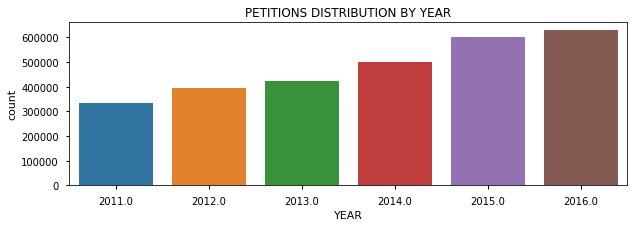

In [41]:

sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,3))
plt.title('PETITIONS DISTRIBUTION BY YEAR')
sns.countplot(h1b['YEAR'])

H1-B Visa petiton appled by Years and with the graph its prominant that the visa petition is increasing every year

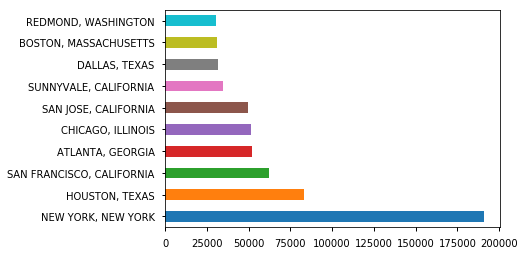

In [42]:
# Top 10 cities as Worksites for H1-B Visa holders
h1b['WORKSITE'].value_counts().head(10).plot(kind='barh')

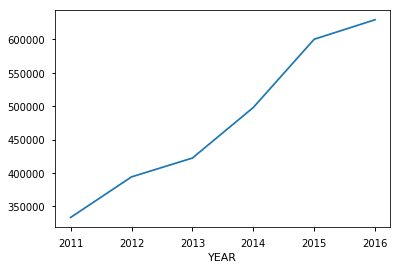

In [43]:
year_growth = h1b.groupby('YEAR')
year_growth['CASE_STATUS'].count()
year_growth['CASE_STATUS'].count().plot()


The trend shows increase in the visa petition every year

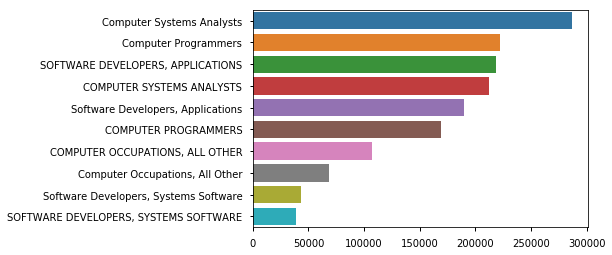

In [44]:

soc = h1b['SOC_NAME'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)

computer systems Analysts has the highest number of visas

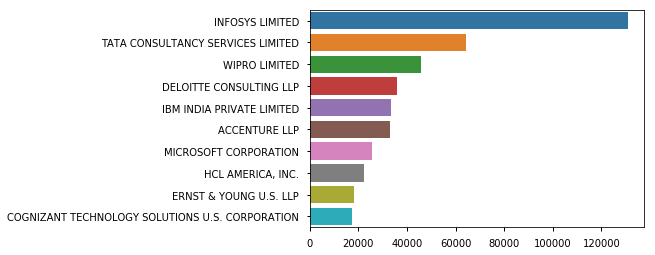

In [45]:
emp = h1b['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

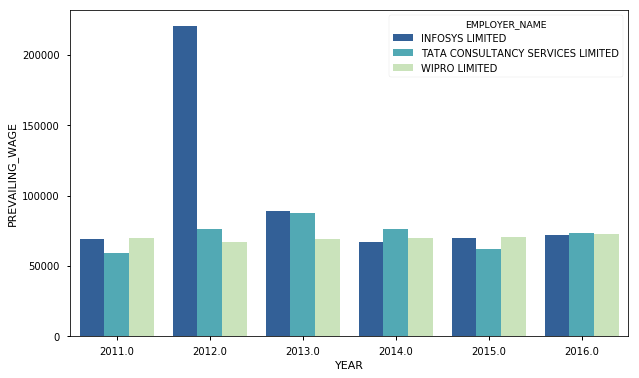

In [46]:

subset = h1b[(h1b['EMPLOYER_NAME'] == 'INFOSYS LIMITED') | (h1b['EMPLOYER_NAME'] == 'TATA CONSULTANCY SERVICES LIMITED') | (h1b['EMPLOYER_NAME'] =='WIPRO LIMITED')] 
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(palette = 'YlGnBu_r',x= 'YEAR',hue = 'EMPLOYER_NAME',y='PREVAILING_WAGE', data = subset.groupby(['YEAR','EMPLOYER_NAME']).agg({'PREVAILING_WAGE':'mean'}).reset_index())

Among the #top companies Infosys, TCS and Wipro applied the maximum visa petition but in 2012 Infosys applied the way more than any other companies

In [47]:
#Get the states values in the worksite separating the city and the state
H1bCity,H1bState = h1b['WORKSITE'].str.split(', ',1).str 

['CERTIFIED' 'CERTIFIED-WITHDRAWN' 'DENIED' 'WITHDRAWN' 'Others']
[2512114  195721   85161   84752      17]


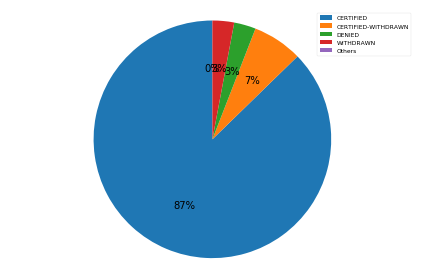

In [218]:
#Analyze the H1Bs by the status of their visa applications
statusCount = h1b['CASE_STATUS'].value_counts()
statusTypes = statusCount.index.copy(deep=True)
statusTypes = statusTypes.values
statusTypes[4] = 'Others'
statusTypes = statusTypes[0:5]

statusValues = statusCount.copy()
statusValues = statusValues.values
statusValues[4] = np.sum(statusValues[4:7])
statusValues = statusValues[0:5]
print(statusTypes)
print(statusValues)

fig1 = plt.pie(statusValues, autopct='%1.0f%%', shadow=False, startangle=90)
plt.legend(statusTypes, loc="best", prop={'size':6})
plt.axis('equal')
plt.tight_layout()
plt.show()
#The graph shows that there are 87% certified cases and 3% denied visa petiton

In [50]:
#Correlation between H1bs per capita and voters. There is a correlation between the no of legal immigrants and the
#total population state wise.
H1bCity,H1bState = h1b['WORKSITE'].str.split(', ',1).str #Get the states values

#Putting everything in a dataframe
H1bStateCounts = H1bState.value_counts()
H1bStateCounts = H1bStateCounts.to_frame()
H1bStateCounts.columns = ['People']
H1bStateCounts = H1bStateCounts[H1bStateCounts.index!='NA']
H1bStateCounts = H1bStateCounts.sort_index()

#Importing population data from the 2010 census and merging it with the dataframe with the H1b values
PopulationInfo = [4779736, 710231, 6392017, 2915918, 37253956, 5029196,
           3574097, 897934, 601723, 18801310, 9687653, 1360301, 
           1567582, 12830632, 6483802, 3046355, 2853118, 4339367, 
           4533372, 1328361, 5773552, 6547629, 9883640, 5303925, 
           2967297, 5988927, 989415, 1826341, 2700551, 1316470, 8791894, 
           2059179, 19378102, 9535483, 672591, 11536504, 3751351, 3831074, 
           12702379, 3725789, 1052567, 4625364, 814180, 6346105, 25145561, 
           2763885, 625741, 8001024, 6724540, 1852994, 5686986, 563626]
H1bStateCounts['TotalPopulation'] = PopulationInfo


#Compute the H1bs per capita means the total number of immigrants with respect to the total population of the state
H1bStateCounts['H1bPerCapita'] = np.divide(H1bStateCounts['People'].values,H1bStateCounts['TotalPopulation'].values)

#Sort by H1bs per Capita hence the District of Columbia has the highest immigrants when compared with the state population
#but the no of visa petition is highest in New York. But when compare to population of the state New York is 7th in terms of per capita
H1bStateCounts.sort_values('H1bPerCapita',ascending=False)


,People,TotalPopulation,H1bPerCapita
DISTRICT OF COLUMBIA,22408,601723,0.037240
NEW JERSEY,206876,8791894,0.023530
DELAWARE,17705,897934,0.019717
MASSACHUSETTS,112659,6547629,0.017206
WASHINGTON,100754,6724540,0.014983
CALIFORNIA,548539,37253956,0.014724
NEW YORK,282429,19378102,0.014575
CONNECTICUT,48174,3574097,0.013479
ILLINOIS,154843,12830632,0.012068
TEXAS,286704,25145561,0.011402


In [ ]:
#Exploratory Analysis

In [227]:
topEmp = list(h1b['EMPLOYER_NAME'][h1b['YEAR'] >= 2015.0].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
byEmpYear = h1b[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][h1b['EMPLOYER_NAME'].isin(topEmp)]
byEmpYear = byEmpYear.groupby([h1b['EMPLOYER_NAME'],h1b['YEAR']])

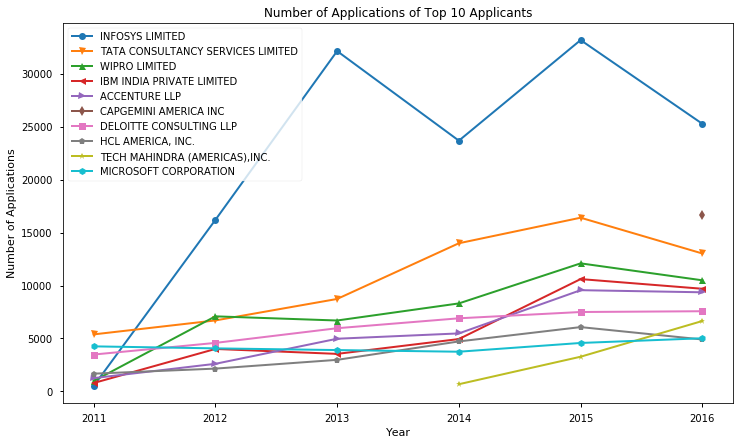

In [222]:
markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']
fig = plt.figure(figsize=(12,7))
for company in topEmp:
    tmp = byEmpYear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[topEmp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

We can see that there are 2 new companies: CAPGEMINI and TECH MAHINDRA. 
Analysis
INFOSYS shows a very rapid development, especially during period from 2011 to 2013, where it came from about zero to 32k applications!
TATA also shows a significant development.
Except for 2 new comers, we can see that all top EMPLOYERS have peaks of numbers of applications at the year of 2015 and a trend of decreasing to 2016. There could be a social or political event relating to this trend!
All the top applicants of visa applications are from India.


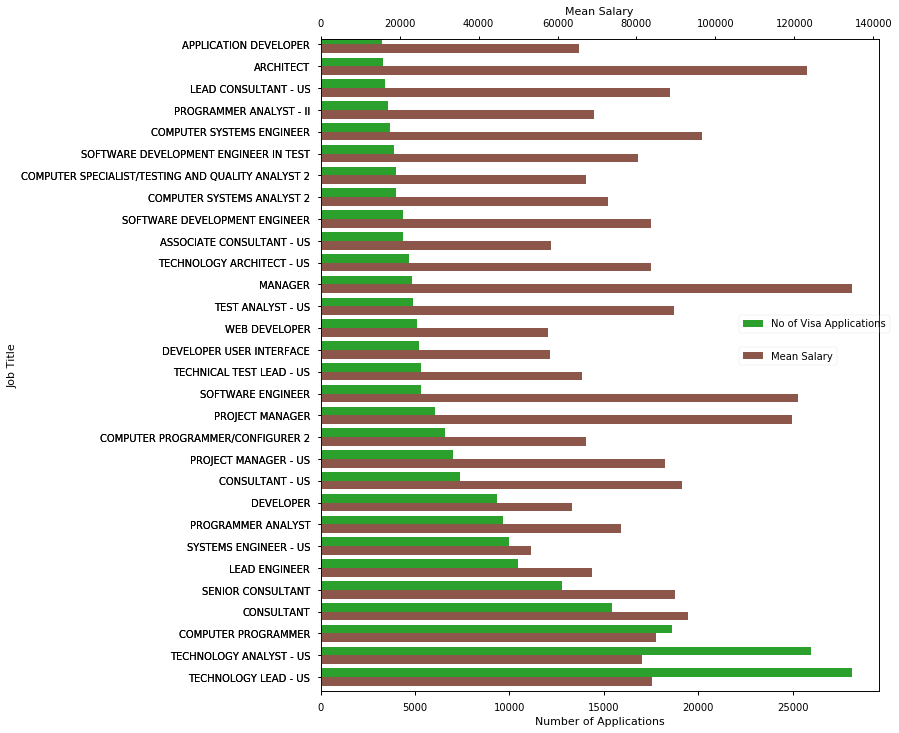

In [223]:
PopJobs = h1b[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']][h1b['EMPLOYER_NAME'].isin(topEmp)].groupby(['JOB_TITLE'])
topJobs = list(PopJobs.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(30).index)
df = PopJobs.count().loc[topJobs].assign(mean_wage=PopJobs.mean().loc[topJobs])
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.20
df.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='C2', width=0.4, position=0, label='No of Visa Applications')
df.mean_wage.plot(kind='barh', ax=ax2, color='C5', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('Number of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Mean Salary')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()

Top job titles from top 10 applications are mostly IT jobs. The most popular jobs are "Technology Lead" and "Technology Analyst" 
but the salaries are not top, they are in middle. The top offering salary is "Manager", which is reasonable. 


Data Scientist - Analysis and Prediction
Data Scientist job is very popular and every company wants to hire such people with data science skill sets,
so with some analysis and prediction on the number of Data Scientist jobs. 
The regression used, where the feature is a power function of year. From figure below the number of Data scientist jobs is increasing rapidly (power of 2.32) and
expect to have about 1.5k and 2.1k Data Scientist jobs in 2017 and 2018 and this is from Data Scientist from other countries

# PART - B 
a. A clear description of the question being asked.
Likelihood of being eligible to file H1-B Visa and to find with the past data the companies
which files the maximum visa petition and Job profile is required.

b.Background research of related work
Exploratory analysis:Before building a model, it is important to explore the data. 
Every variable has to be analyzed and different statistics such as mean, maximum, 
minimum needs to be checked to handle the outliers. 
Missing values should be investigated properly to check their significance. 
Hence did some research before starting, read few articles and posts related to the similar kind of
analysis done before. Plotted lots of graphs, learnt how to clean the data and pre process it.

c. Data sources
https://www.kaggle.com/nsharan/h-1b-visa
    Its a kaggle dataset for a competition

d.What algorithms are being used and code sources. 
Algorithms are 
1.Forcasting/prediction - To show the future trend of the demand
2.Clustering - To find similar groups in the data based on location and salary
3.Model Building - DECISION TREE
Decision tree is one of the most sophisticated supervised learning technique which 
works on any kind of data whether categorical or continuous. There are no assumptions 
considered about the data. It even works on missing values and no imputation is required.
It splits the tree into different branches using the most relevant
characteristics until end of the tree is reached. Tree will continue to grow recursively 
combining multiple influential features until homogenous groups are found. It assumes that 
decision boundaries are parallel to axes and create rules with the help of explanatory variables.
4.Random Forest Tree

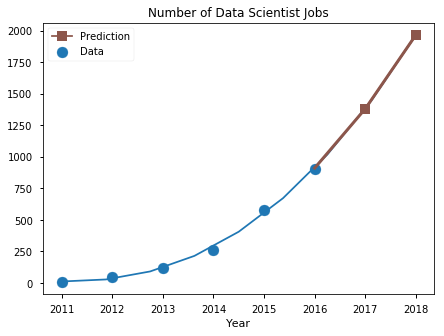

In [226]:

dsj = h1b[['JOB_TITLE','YEAR']][h1b['JOB_TITLE'] == "DATA SCIENTIST"].groupby('YEAR').count()['JOB_TITLE']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2011,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2011,2018,9)
X2 = np.linspace(2016,2018,3)
X3 = np.linspace(2017,2018,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(dsj.index), dsj.values, c='C0', marker='o', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='C0', label='')
plt.plot(X2, func(X2,*popt), color='C5', linewidth=3, marker='s', markersize=1, label='')
plt.plot(X3, func(X3,*popt), color='C5', marker='s', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of Data Scientist Jobs')
plt.xlabel('Year')
plt.show()

The graph shows the increase in the data Science jobs from 2011 till 2016 and also prediction in 2017 and 2018
as the growing number of jobs are doubling every year hence in 2018 the prediction says that the data scientist jobs will 
be in high demand hence people looking for growth and exciting opportunities should prepare them with the skill sets 
required for DS

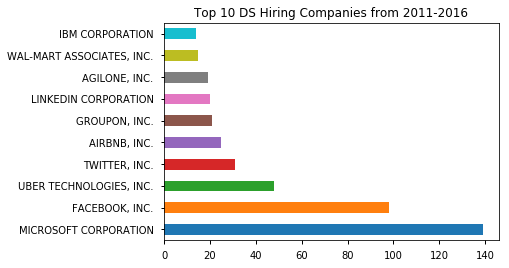

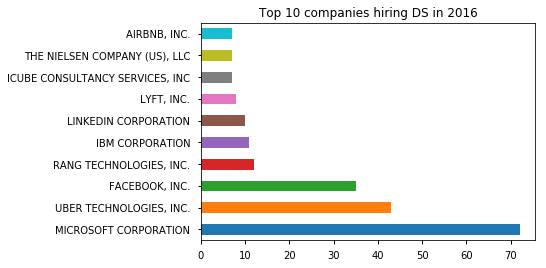

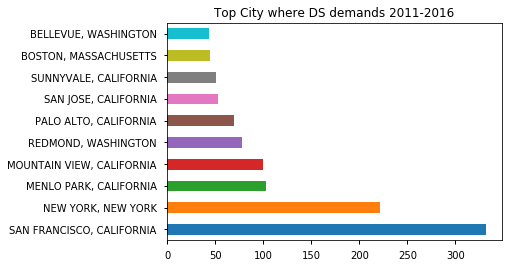

In [229]:
#Companies who hire data scientist mostly and the location of such job opportunities
ax1 = h1b[h1b['JOB_TITLE'] == "DATA SCIENTIST"]['EMPLOYER_NAME'].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 DS Hiring Companies from 2011-2016")
ax1.set_ylabel("")
plt.show()
ax2 = h1b[h1b['JOB_TITLE'] == "DATA SCIENTIST"]['EMPLOYER_NAME'][h1b['YEAR'] == 2016.0].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 companies hiring DS in 2016")
ax2.set_ylabel("")
plt.show()
ax3 = h1b[h1b['JOB_TITLE'] == "DATA SCIENTIST"]['WORKSITE'].groupby(h1b['WORKSITE']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top City where DS demands 2011-2016")
ax3.set_ylabel("")
plt.show()

The analysis shows that Data Scientist hiring companies are IT and Tech mostly. Most imp highlight is that half of the applications for Data scientist from MICROSOFT CORPORATION in 2016.

Also Walmart is in the top list for 2011 to 2016 timeframe. 
Since all top IT and tech companies have offices in Silicon Valley, New York and Seattle area, top cities Data scientists work in are all in California, New York and Washington.

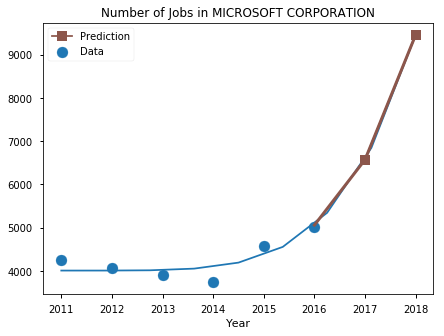

In [231]:

dsj = h1b[['EMPLOYER_NAME','YEAR']][h1b['EMPLOYER_NAME'] == "MICROSOFT CORPORATION"].groupby('YEAR').count()['EMPLOYER_NAME']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2011,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2011,2018,9)
X2 = np.linspace(2016,2018,3)
X3 = np.linspace(2017,2018,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(dsj.index), dsj.values, c='C0', marker='o', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='C0', label='')
plt.plot(X2, func(X2,*popt), color='C5', linewidth=3, marker='s', markersize=1, label='')
plt.plot(X3, func(X3,*popt), color='C5', marker='s', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of Jobs in MICROSOFT CORPORATION')
plt.xlabel('Year')
plt.show()

The graph shows the increase in the jobs at Microsoft from 2011 till 2016 and also prediction in 2017 and 2018
as the growing number of jobs initially is not increasing that much as it is pretty straight in the graph but are increasing rapidly in 2018 the prediction says that the data scientist jobs will 
be in high demand hence people looking for growth and exciting opportunities should prepare them with the skill sets 
required for DS

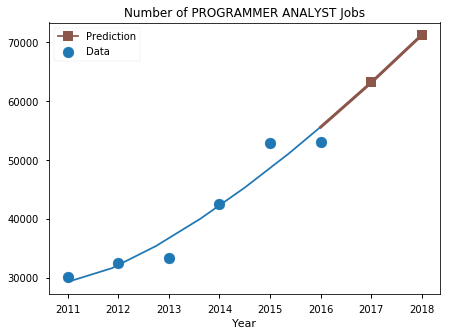

In [230]:

dsj = h1b[['JOB_TITLE','YEAR']][h1b['JOB_TITLE'] == "PROGRAMMER ANALYST"].groupby('YEAR').count()['JOB_TITLE']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2011,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2011,2018,9)
X2 = np.linspace(2016,2018,3)
X3 = np.linspace(2017,2018,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(dsj.index), dsj.values, c='C0', marker='o', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='C0', label='')
plt.plot(X2, func(X2,*popt), color='C5', linewidth=3, marker='s', markersize=1, label='')
plt.plot(X3, func(X3,*popt), color='C5', marker='s', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of PROGRAMMER ANALYST Jobs')
plt.xlabel('Year')
plt.show()

The graph shows the increase in the Programmer Analyst jobs from 2011 till 2016 and also prediction in 2017 and 2018
as the growing number of jobs are doubling every year hence in 2018 the prediction says that the programmer jobs will 
be in high demand hence people looking for growth and exciting opportunities should prepare them with the skill sets 
required for Programmer

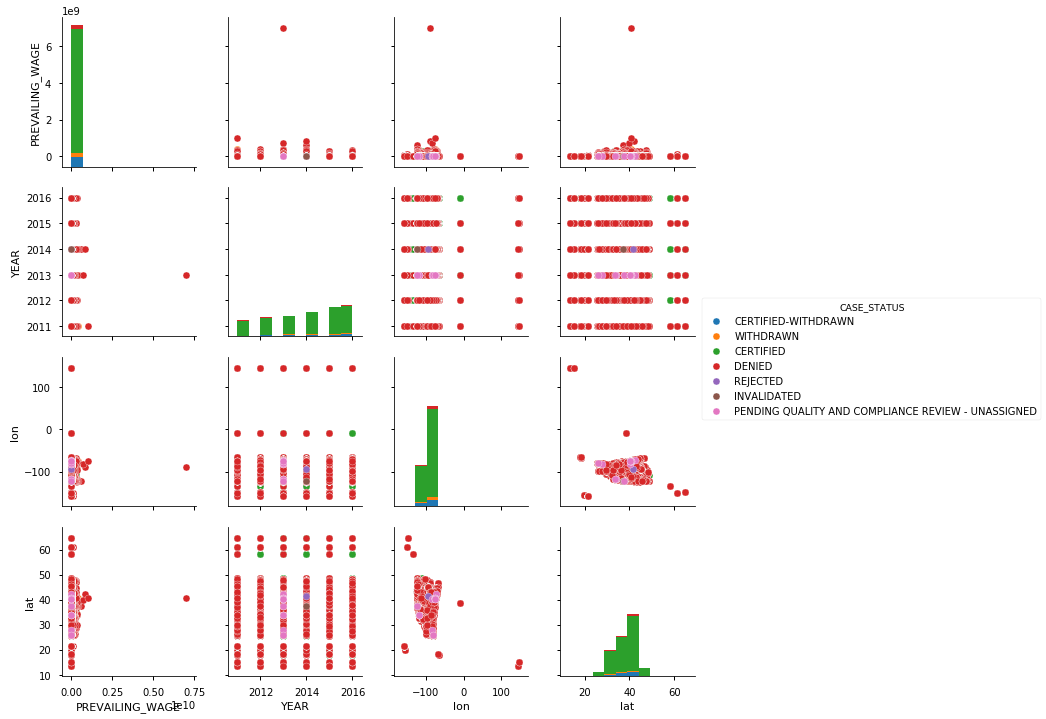

In [243]:
# Quick plot of the data using seaborn
sns.pairplot(h1b, hue="CASE_STATUS")


In [64]:
#Unsupervised learning - K-Means Clustering to see where H1Bs are more  prominant in terms of location and salary
#Reading Latitude and Longitude data (taking out N/As)
h1b
#Reading Latitude and Longitude data (taking out N/As)
H1bLatLong = h1b.loc[H1bState != 'NA']
H1bLatLong = H1bLatLong[['lon','lat']]
H1bLatLong = H1bLatLong.dropna();
H1bLong = H1bLatLong['lon'].values
H1bLat = H1bLatLong['lat'].values


In [65]:
#K-Means clustering to see where the applicants from hence Optimal K is 10
nClusters = 10
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(H1bLatLong.values)

kl = kmeans.labels_ #Getting the cluster for each case
H1bLatLong['Cluster'] = kl

H1bLatLong['State'] = H1bState
H1bLatLong = H1bLatLong.dropna()
H1bLatLong.sort_values('Cluster')
print(H1bLatLong[['Cluster','State']].drop_duplicates().sort_values('Cluster')) 
#See which states a cluster cover

        Cluster                 State
599040        0            NEW MEXICO
1             0                 TEXAS
137994        0               ARIZONA
348           0              OKLAHOMA
349           0              ARKANSAS
865           0                KANSAS
112           0             LOUISIANA
16087         0              MISSOURI
9003          0           MISSISSIPPI
204           1              DELAWARE
109           1         NEW HAMPSHIRE
94            1         MASSACHUSETTS
70            1          PENNSYLVANIA
62            1              MARYLAND
44            1              NEW YORK
315           1                 MAINE
300           1           CONNECTICUT
9             1              VIRGINIA
34            1          RHODE ISLAND
2             1            NEW JERSEY
82214         1         WEST VIRGINIA
30            1  DISTRICT OF COLUMBIA
15686         1        NORTH CAROLINA
1847          1               VERMONT
7             2            CALIFORNIA
8242        

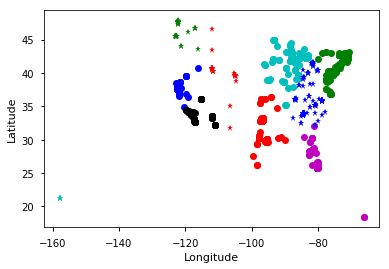

In [66]:
pltIndex = range(0,10501,5)

plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 0], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 0], "ro")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 1], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 1], "go")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 2], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 2], "bo")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 3], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 3], "co")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 4], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 4], "mo")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 5], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 5], "ko")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 6], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 6], "r*")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 7], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 7], "g*")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 8], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 8], "b*")
plt.plot(H1bLatLong.iloc[pltIndex,0].loc[H1bLatLong.iloc[pltIndex,2] == 9], H1bLatLong.iloc[pltIndex,1].loc[H1bLatLong.iloc[pltIndex,2] == 9], "c*")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [67]:
#Salary Data according to clusters
H1bSalary = H1bLatLong
H1bSalary['Salary'] = h1b['PREVAILING_WAGE']
H1bSalary['FT'] = h1b['FULL_TIME_POSITION']
H1bSalary['SOC'] = h1b['SOC_NAME']

In [68]:
salaryMin = np.zeros(nClusters)
salaryMax = np.zeros(nClusters)
salaryMean = np.zeros(nClusters)
salaryMedian = np.zeros(nClusters)
salaryStd = np.zeros(nClusters)

for k in range(0,nClusters):
    salaryClustered = H1bSalary.loc[H1bSalary['Cluster'] == k]
    salaryClustered = salaryClustered.loc[salaryClustered['FT'] == 'Y'] #We only consider full-time employment
    salaryClustered = salaryClustered.loc[salaryClustered['Salary'] <= 5000000] #We take out extreme outliers
    salaryClustered = salaryClustered.loc[salaryClustered['Salary'] > 0] # We take out non-paid positions
    salaryClustered = salaryClustered.dropna()
    salaryMin[k] = np.min(salaryClustered['Salary'].values)
    salaryMax[k] = np.max(salaryClustered['Salary'].values)
    salaryMean[k] = np.mean(salaryClustered['Salary'].values)
    salaryMedian[k] = np.median(salaryClustered['Salary'].values)
    salaryStd[k] = np.std(salaryClustered['Salary'].values)

In [69]:
#Statistics
salaryStats = pd.DataFrame()
salaryStats['Mean'] = salaryMean.astype(int)
salaryStats['Median'] = salaryMedian.astype(int)
salaryStats['Std'] = salaryStd.astype(int)
salaryStats['Min'] = salaryMin.astype(int)
salaryStats['Max'] = salaryMax
salaryStats

,Mean,Median,Std,Min,Max
0,68438,63981,34940,14000,4996888.0
1,72496,67700,35449,2012,4865100.0
2,90015,86611,31190,2000,4971600.0
3,65884,62234,30334,15080,4538560.0
4,64048,58157,53052,15080,4848792.0
5,71929,69160,39216,7799,4985760.0
6,69570,64230,38104,2011,4648800.0
7,80756,81307,27822,14851,2897400.0
8,65888,61942,32275,63,4729920.0
9,61037,55474,37268,16827,1040000.0


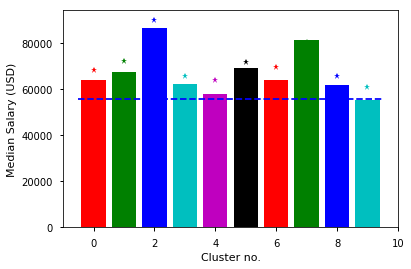

In [70]:
#Plotting and comparison to the median US salary
plt.bar(0,salaryMedian[0], color = "r")
plt.bar(1,salaryMedian[1], color = "g")
plt.bar(2,salaryMedian[2], color = "b")
plt.bar(3,salaryMedian[3], color = "c")
plt.bar(4,salaryMedian[4], color = "m")
plt.bar(5,salaryMedian[5], color = "k")
plt.bar(6,salaryMedian[6], color = "r")
plt.bar(7,salaryMedian[7], color = "g")
plt.bar(8,salaryMedian[8], color = "b")
plt.bar(9,salaryMedian[9], color = "c")
plt.plot(0,salaryMean[0], "r*")
plt.plot(1,salaryMean[1], "g*")
plt.plot(2,salaryMean[2], "b*")
plt.plot(3,salaryMean[3], "c*")
plt.plot(4,salaryMean[4], "m*")
plt.plot(5,salaryMean[5], "k*")
plt.plot(6,salaryMean[6], "r*")
plt.plot(7,salaryMean[7], "g*")
plt.plot(8,salaryMean[8], "b*")
plt.plot(9,salaryMean[9], "c*")
plt.plot(np.arange(-0.5,10.5,1),55775*np.ones(11), "b--")
plt.xlabel('Cluster no.')
plt.ylabel('Median Salary (USD)')
plt.show()
#Cluster 2 and 7 has the maximum salary and the median is $55474

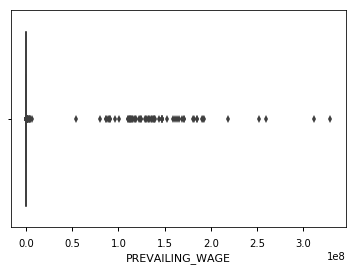

In [220]:
# plotting a box  plot 

df1=h1b[h1b['YEAR']==2016]
plt.figure()
sns.boxplot(x='PREVAILING_WAGE', data = df1)

Boxplot of the 'Prevailing_Wage' variable. We can see a large cluster of points just outside the upper 
limit of each of the boxplots and a few sparse points even further along on the x axis. 
These will be treated as outliers.

In [84]:
mean_wage = df1['PREVAILING_WAGE'].mean() 
## computing the mean wage 
SD_wage  = df1['PREVAILING_WAGE'].std() 
## computing the standard deviation

In [85]:
wage = df1['PREVAILING_WAGE']
df1['Outlier'] = 0  
# assign a seperate column named Outlier and fill with zeros 
min = mean_wage + 2*SD_wage
max = mean_wage - 2*SD_wage
## Assign a value of 1 to the outlier column if a data point is outside the min or max range defined above 
df1.loc[wage < min, 'Outlier'] = 1
df1.loc[wage > max, 'Outlier'] = 1

# remove outlier from the dataset and drop the outlier column 
outliers_bool = df1['Outlier'] !=1
df2 = df1[outliers_bool]  

data = df2[df2['PREVAILING_WAGE'] > 0] 
## keeping only the values above zero

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
x = h1b[['EMPLOYER_NAME','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','PREVAILING_WAGE','WORKSITE']]
#setting target
y = h1b['CASE_STATUS']

In [95]:
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from math import isnan
from sklearn import tree

In [93]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


In [97]:
    #Analyze the H1Bs by the status of their visa applications and show the plot
    def showCASE_STATUS(self,h1b):
        statusCount = h1b['CASE_STATUS'].value_counts()
        statusTypes = statusCount.index.copy(deep=True)
        statusTypes = statusTypes.values
        statusTypes[4] = 'Others'  
        # PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED , simplified to 'other'
        statusTypes = statusTypes[0:5]

        statusValues = statusCount.copy()
        statusValues = statusValues.values
        statusValues[4] = np.sum(statusValues[4:7])  
        # sum all of the others
        statusValues = statusValues[0:5]


        piefig = plt.pie(statusValues, autopct='%1.00f%%', shadow=False, startangle=90)
        plt.legend(statusTypes, loc="best", prop={'size':6})
        plt.axis('equal')
        plt.tight_layout()
        plt.title('Case Status percentage')
        plt.show()

In [132]:

H1Info=h1b[h1b['YEAR']==2016]


In [133]:
H1Info.groupby('YEAR').mean().PREVAILING_WAGE

YEAR
2016.0    89016.34411
Name: PREVAILING_WAGE, dtype: float64

In [138]:
        statusCount = H1Info['CASE_STATUS'].value_counts()
        statusTypes = statusCount.index.copy(deep=True)
        statusTypes = statusTypes.values
        #statusTypes[4] = 'Others'   # PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED , simplified to 'other'
        statusTypes = statusTypes[0:5]

In [140]:
        statusValues = statusCount.copy()
        statusValues = statusValues.values
        statusValues = statusValues[0:5]

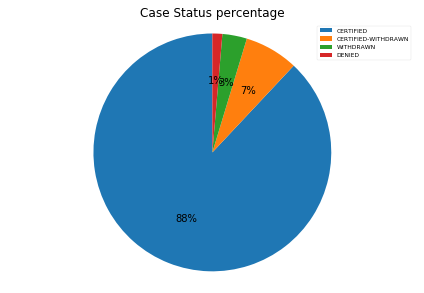

In [142]:
piefig = plt.pie(statusValues, autopct='%1.00f%%', shadow=False, startangle=90)
plt.legend(statusTypes, loc="best", prop={'size':6})
plt.axis('equal')
plt.tight_layout()
plt.title('Case Status percentage')
plt.show()

In [143]:
H1City,H1State = H1Info['WORKSITE'].str.split(', ',1).str
#Reading Latitude and Longitude data (taking out null)
H1LatLong = H1Info.loc[H1State != 'NA']
H1LatLong = H1LatLong[['lon','lat']]
H1LatLong = H1LatLong.dropna()
H1Long = H1LatLong['lon'].values
H1Lat = H1LatLong['lat'].values

The same clustering algorithm is applied but is used for data year = 2016

In [144]:

nClusters = 10
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(H1LatLong.values)
#Getting the cluster for each case
kl = kmeans.labels_
H1LatLong['Cluster'] = kl
H1LatLong['State'] = H1State
H1LatLong = H1LatLong.dropna()
print (H1LatLong)

               lon        lat  Cluster                 State
0       -83.743038  42.280826        3              MICHIGAN
1       -96.698886  33.019843        4                 TEXAS
2       -74.077642  40.728158        2            NEW JERSEY
3      -104.990251  39.739236        6              COLORADO
4       -90.199404  38.627003        8              MISSOURI
5       -80.191790  25.761680        0               FLORIDA
6       -95.369803  29.760427        4                 TEXAS
7      -121.886329  37.338208        1            CALIFORNIA
9       -77.265260  38.901222        2              VIRGINIA
10      -79.995886  40.440625        2          PENNSYLVANIA
11      -84.247212  43.615583        3              MICHIGAN
13      -80.191790  25.761680        0               FLORIDA
14     -104.950814  39.617210        6              COLORADO
15      -77.429130  39.006699        2              VIRGINIA
16      -88.231481  43.011678        3             WISCONSIN
17     -118.243685  34.0

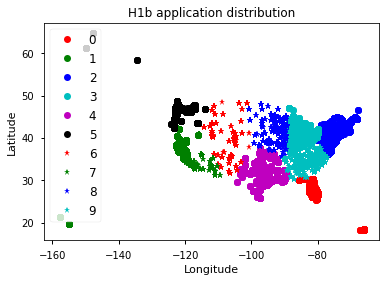

In [148]:
dense = 2
pltIndex = range(0,628803,dense)

#plot collor
colorSet = ['ro','go','bo','co','mo','ko','r*','g*','b*','c*']
CIndex = range(0,10)

for i in CIndex:
    plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == i], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == i], colorSet[i])

#axis label name
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(CIndex, loc="upper left", prop={'size':12})
plt.title('H1b application distribution')
plt.show()

In [149]:
nClusters = 10
H1Salary = H1LatLong
H1Salary['Salary'] = H1Info['PREVAILING_WAGE']
H1Salary['FT'] = H1Info['FULL_TIME_POSITION']

salaryMin = np.zeros(nClusters)
salaryMax = np.zeros(nClusters)
salaryMean = np.zeros(nClusters)
salaryMedian = np.zeros(nClusters)
salaryStd = np.zeros(nClusters)

nClusters = 10
for k in range(0,nClusters):
    #which cluster belongs to
    salaryClustered = H1Salary.loc[H1Salary['Cluster'] == k]
    #only consider full-time employment
    salaryClustered = salaryClustered.loc[salaryClustered['FT'] == 'Y']
    #take out extreme outliers
    salaryClustered = salaryClustered.loc[salaryClustered['Salary'] <= 5000000]
    # take out non-paid positions
    salaryClustered = salaryClustered.loc[salaryClustered['Salary'] > 0]
    #drop N/A
    salaryClustered = salaryClustered.dropna()

    #each cluster's description
    salaryMin[k] = np.min(salaryClustered['Salary'].values)
    salaryMax[k] = np.max(salaryClustered['Salary'].values)
    salaryMean[k] = np.mean(salaryClustered['Salary'].values)
    salaryMedian[k] = np.median(salaryClustered['Salary'].values)
    salaryStd[k] = np.std(salaryClustered['Salary'].values)

In [150]:
salaryStats = pd.DataFrame()
salaryStats['Mean'] = salaryMean.astype(int)
salaryStats['Median'] = salaryMedian.astype(int)
salaryStats['Std'] = salaryStd.astype(int)
salaryStats['Min'] = salaryMin.astype(int)
salaryStats['Max'] = salaryMax

print (salaryStats)

     Mean  Median    Std    Min        Max
0   92580   83741  75085  70013  3277248.0
1  104850  100277  29326  70013  4193280.0
2   92194   84864  30512  70010  4087356.0
3   87702   81827  22602  70013   827424.0
4   91563   83616  34992  70013  4316000.0
5   95819   89669  18930  70033   320000.0
6   91375   82243  25661  70075   264929.6
7   90322   85654  22864  70004  1168380.0
8   91099   80538  28495  70013   330780.0
9   87090   79394  20645  70013   611730.0


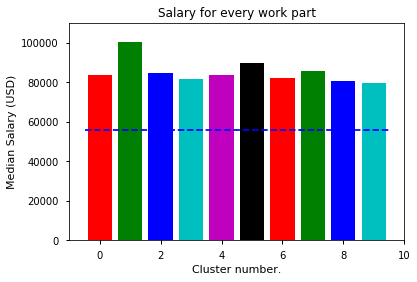

In [151]:
colorSet = ['r','g','b','c','m','k','r','g','b','c']
colorSetS = ['r*','g*','b*','c*','m*','k*','r*','g*','b*','c*']
CIndex = range(0,10)
for i in CIndex:
    plt.bar(i,salaryMedian[i], color = colorSet[i])

for i in CIndex:
    plt.plot(i,salaryMean[i], colorSet[i])

plt.plot(np.arange(-0.5,10.5,1),55775*np.ones(11), "b--")
plt.xlabel('Cluster number.')
plt.ylabel('Median Salary (USD)')
plt.title('Salary for every work part')
plt.show()
#The highest salary indicates for cluster 1 and the median salary for all the clusters in 2016 is approx $82243  

Text(0.5,1,'Top6 company application number')

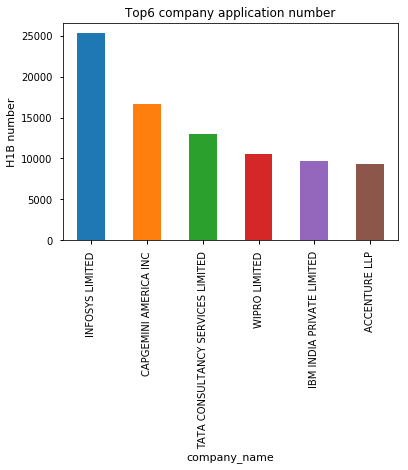

In [152]:
comptable = H1Info['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).head(6)
comptable.plot(kind='bar')
plt.ylabel('H1B number')
plt.xlabel('company_name')
plt.title('Top6 company application number')

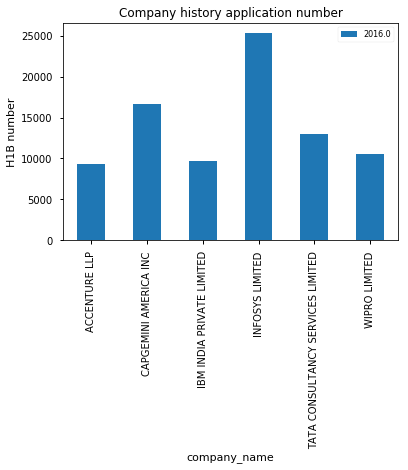

In [153]:
comptable2=H1Info[H1Info['EMPLOYER_NAME'].isin(comptable.index.values)]
comptable2 = comptable2.groupby(['EMPLOYER_NAME','YEAR']).size().unstack()
comptable2.plot(kind='bar')
plt.ylabel('H1B number')
plt.xlabel('company_name')
plt.legend(loc="upper right", prop={'size':8})
plt.title('Company history application number')
plt.show()

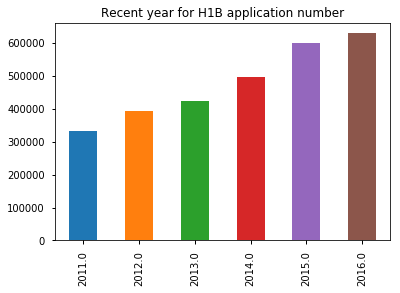

In [155]:
yearTrend = h1b['YEAR'].value_counts().sort_values(ascending=True)
yearTrend.plot(kind = 'bar')
plt.title('Recent year for H1B application number')
plt.show()

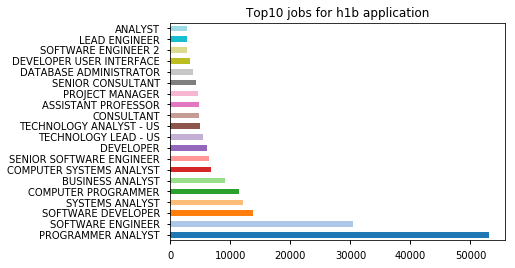

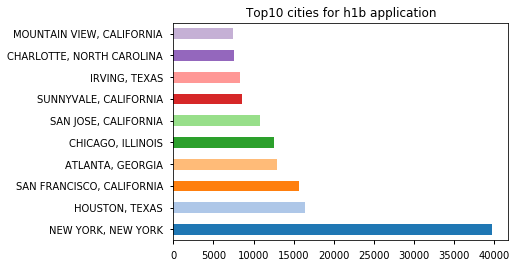

In [156]:
H1Info['JOB_TITLE'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh',color=tableau20)
plt.title('Top10 jobs for h1b application')
plt.show()
H1Info['WORKSITE'].value_counts().head(10).plot(kind='barh',color=tableau20)
plt.title('Top10 cities for h1b application')
plt.show()

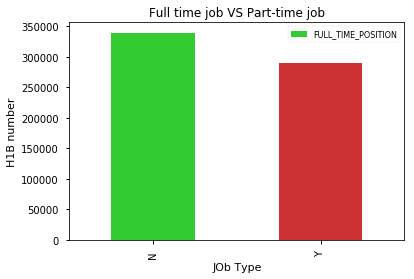

In [158]:
fullTime = H1Info.FULL_TIME_POSITION.value_counts().plot(kind = 'bar',color=[(0.2,0.8,0.2),(0.8,0.2,0.2)])
plt.ylabel('H1B number')
plt.xlabel('JOb Type')
plt.legend(loc="upper right", prop={'size':8})
plt.title('Full time job VS Part-time job')
plt.show()

# Decision Tree

In [166]:

#-----------  data process  -----------
xSet1 = H1Info.loc[:,'WORKSITE']
WORKSITE_List = xSet1.drop_duplicates().values
X_input1 = []
for i in xSet1:
    X_input1.append(WORKSITE_List.tolist().index(i))

xSet2 = H1Info.loc[:,'EMPLOYER_NAME']
EMPLOYER_NAME_List = xSet2.drop_duplicates().values
X_input2 = []
for i in xSet2:
    X_input2.append(EMPLOYER_NAME_List.tolist().index(i))

xSet3 = H1Info.loc[:,'CASE_STATUS']
CASE_STATUS_List = xSet3.drop_duplicates().values
X_input3 = []
for i in xSet3:
    X_input3.append(CASE_STATUS_List.tolist().index(i))

#salary range
xSet4 = H1Info.loc[:,'PREVAILING_WAGE']
#define salary range
salaryRange = [20000.00,40000.00,60000.00,80000.00,100000.00,120000.00,140000.00,
               160000.00,180000.00,200000.00,400000.00,500000.00,1000000.00,2000000.00,float("inf")]
X_input4 = []
count = 0
for i in xSet4:
    # deal with na !
    if isnan(i):
        i = 0
    for j in range(0,len(salaryRange)):
        if i <= salaryRange[j]:
            X_input4.append(j)
            break
        elif i > salaryRange[j]:
            continue

In [167]:
# -----------  decision Tree ALG  -----------
x_input = np.zeros([3,len(X_input4)])
x_input[0] = X_input1
x_input[1] = X_input2
x_input[2] = X_input4
x_matrix = x_input.transpose()

In [168]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_matrix, X_input3)

In [235]:
print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(clf,x_matrix,X_input3,cv=10).mean())

KfoldCrossVal mean score using Decision Tree is 0.7716521768929983


In [236]:
                                
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(x_matrix, X_input3, test_size= .4, random_state=0)

# Decision Tree cross validation


print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(clf,x_matrix,X_input3,cv=10).mean())



y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.7717522857036031
Accuracy score using Decision Tree is 0.853952804703639


In [187]:
print(x_input)

[[0.0000e+00 1.0000e+00 2.0000e+00 ... 6.8000e+02 1.7800e+03 6.0000e+00]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.8774e+04 7.1180e+03 1.2292e+04]
 [1.0000e+00 1.0000e+01 9.0000e+00 ... 3.0000e+00 2.0000e+00 5.0000e+00]]


In [234]:
#Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(x_matrix, X_input3, test_size= .4, random_state=0)

# Decision Tree cross validation


print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(DTm,x_matrix,X_input3,cv=10).mean())

# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.7716235710316827
Accuracy score using Decision Tree is 0.853952804703639


In [190]:


salary_level = j

worksite = WORKSITE_List.tolist().index(H1Info.loc[:,'WORKSITE'].all())
employ = EMPLOYER_NAME_List.tolist().index(H1Info['EMPLOYER_NAME'].all())

    
tree_result = clf.predict([[worksite, employ,salary_level ]])

CASE_STATUS_List[tree_result]
print (CASE_STATUS_List[tree_result])

['CERTIFIED']


Random Forest classifier

In [241]:
# Random Forest classifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500)
                                
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(x_matrix, X_input3, test_size= .4, random_state=0)



# Random Forest metrics
sm = RFm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Random Forest is 0.8724257111075798


Code Sources -
https://www.kaggle.com/gskhurana/h1b-visa-prediction/notebook
https://github.com/ryankarlos/H1-B-US-Visa-Petition-Data/blob/master/Code/Cytora_exercise_RyanNazareth.ipynb
https://www.kaggle.com/atalanteonthefly/logistic-regression-from-scratch
    
e. References
https://python-graph-gallery.com/
https://community.modeanalytics.com/python/tutorial/counting-and-plotting-in-python/
https://www.kaggle.com/ikkiaensland/h1b-demographics-and-salaries-analysis
https://www.kaggle.com/ikkiaensland/h1b-demographics-and-salaries-analysis
https://nycdatascience.com/blog/student-works/h-1b-visa-petitions-exploratory-data-analysis/

f. Analysis 
    When applied the model 
    Decision Tree Accuracy is 85%
    Random Forset is 87%
Will go ahead with Random Forest Classification model

